In [1]:
# revisiting the XOR and donut problems to show how features
# can be learned automatically using neural networks.
#
# the notes for this class can be found at: 
# https://deeplearningcourses.com/c/data-science-deep-learning-in-python
# https://www.udemy.com/data-science-deep-learning-in-python

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# for binary classification! no softmax here

def forward(X, W1, b1, W2, b2):
    # sigmoid
    # Z = 1 / (1 + np.exp( -(X.dot(W1) + b1) ))

    # tanh
    # Z = np.tanh(X.dot(W1) + b1)

    # relu
    Z = X.dot(W1) + b1
    Z = Z * (Z > 0)

    activation = Z.dot(W2) + b2
    Y = 1 / (1 + np.exp(-activation))
    return Y, Z


def predict(X, W1, b1, W2, b2):
    Y, _ = forward(X, W1, b1, W2, b2)
    return np.round(Y)


def derivative_w2(Z, T, Y):
    # Z is (N, M)
    return (T - Y).dot(Z)

def derivative_b2(T, Y):
    return (T - Y).sum()


def derivative_w1(X, Z, T, Y, W2):
    # dZ = np.outer(T-Y, W2) * Z * (1 - Z) # this is for sigmoid activation
    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(T-Y, W2) * (Z > 0) # this is for relu activation
    return X.T.dot(dZ)


def derivative_b1(Z, T, Y, W2):
    # dZ = np.outer(T-Y, W2) * Z * (1 - Z) # this is for sigmoid activation
    # dZ = np.outer(T-Y, W2) * (1 - Z * Z) # this is for tanh activation
    dZ = np.outer(T-Y, W2) * (Z > 0) # this is for relu activation
    return dZ.sum(axis=0)


def cost(T, Y):
    # tot = 0
    # for n in xrange(len(T)):
    #     if T[n] == 1:
    #         tot += np.log(Y[n])
    #     else:
    #         tot += np.log(1 - Y[n])
    # return tot
    return np.sum(T*np.log(Y) + (1-T)*np.log(1-Y))

error rate: 0.5
true: [0 1 1 0]
pred: [ 0.  0.  0.  0.]
-3.15726656422
error rate: 0.75
true: [0 1 1 0]
pred: [ 1.  0.  0.  0.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
error rate: 0.5
true: [0 1 1 0]
pred: [ 1.  1.  0.  0.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
-1.60993980132
error rate: 0.0
true: [0 1 1 0]
pred: [ 0.  1.  1.  0.]
error rate: 0.25
true: [0 1 1 0]
pred: [ 1.  1.  1.  0.]
error rate: 0.0
true: [0 1 1 0]
pred: [ 0.  1.  1.  0.]
-0.40781260925
-0.173427212263
-0.102484770421
-0.0708758475321
-0.0534592260497
-0.0426075286547
-0.0352498621304
-0.02996

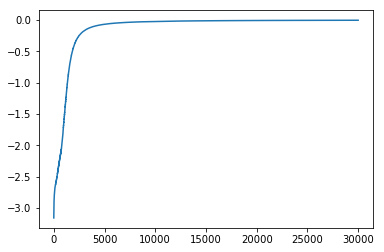

In [6]:
#test_xor
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([0, 1, 1, 0])
W1 = np.random.randn(2, 5)
b1 = np.zeros(5)
W2 = np.random.randn(5)
b2 = 0
LL = [] # keep track of likelihoods
learning_rate = 1e-2
regularization = 0.
last_error_rate = None
for i in range(30000):
    pY, Z = forward(X, W1, b1, W2, b2)
    ll = cost(Y, pY)
    prediction = predict(X, W1, b1, W2, b2)
    er = np.mean(prediction != Y)
    if er != last_error_rate:
        last_error_rate = er
        print("error rate:", er)
        print("true:", Y)
        print("pred:", prediction)
    # if LL and ll < LL[-1]:
    #     print "early exit"
    #     break
    LL.append(ll)
    W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
    b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
    W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
    b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
    if i % 1000 == 0:
        print(ll)

print("final classification rate:", np.mean(prediction == Y))
plt.plot(LL)
plt.show()

In [14]:
# donut example
N = 1000
R_inner = 5
R_outer = 10

# distance from origin is radius + random normal
# angle theta is uniformly distributed between (0, 2pi)
R1 = np.random.randn(int(N/2)) + R_inner
theta = 2*np.pi*np.random.random(int(N/2))
X_inner = np.concatenate([[R1 * np.cos(theta)], [R1 * np.sin(theta)]]).T

R2 = np.random.randn(int(N/2)) + R_outer
theta = 2*np.pi*np.random.random(int(N/2))
X_outer = np.concatenate([[R2 * np.cos(theta)], [R2 * np.sin(theta)]]).T



i: 0 ll: -6196.07194783 classification rate: 0.495
i: 100 ll: -691.100156906 classification rate: 0.558
i: 200 ll: -422.135309296 classification rate: 0.798
i: 300 ll: -294.778897531 classification rate: 0.922
i: 400 ll: -238.096437078 classification rate: 0.944
i: 500 ll: -196.875848813 classification rate: 0.955
i: 600 ll: -165.282722408 classification rate: 0.961
i: 700 ll: -135.571546145 classification rate: 0.974
i: 800 ll: -104.796407135 classification rate: 0.978
i: 900 ll: -70.6367445591 classification rate: 0.987
i: 1000 ll: -63.503747015 classification rate: 0.987
i: 1100 ll: -58.413332567 classification rate: 0.987
i: 1200 ll: -54.5182786247 classification rate: 0.987
i: 1300 ll: -51.0560535155 classification rate: 0.988
i: 1400 ll: -48.1570633009 classification rate: 0.988
i: 1500 ll: -45.8136289581 classification rate: 0.989
i: 1600 ll: -43.8836486315 classification rate: 0.989
i: 1700 ll: -42.2427221885 classification rate: 0.989
i: 1800 ll: -40.7951792605 classification 

i: 15600 ll: -18.1164518185 classification rate: 0.992
i: 15700 ll: -18.0969771081 classification rate: 0.992
i: 15800 ll: -18.0775799296 classification rate: 0.992
i: 15900 ll: -18.0579620568 classification rate: 0.992
i: 16000 ll: -18.0384018942 classification rate: 0.992
i: 16100 ll: -18.0193144107 classification rate: 0.992
i: 16200 ll: -18.0005193188 classification rate: 0.992
i: 16300 ll: -17.9822264603 classification rate: 0.992
i: 16400 ll: -17.9635333694 classification rate: 0.992
i: 16500 ll: -17.9448260183 classification rate: 0.992
i: 16600 ll: -17.9263753789 classification rate: 0.992
i: 16700 ll: -17.909465891 classification rate: 0.992
i: 16800 ll: -17.8913725854 classification rate: 0.992
i: 16900 ll: -17.8739261226 classification rate: 0.992
i: 17000 ll: -17.8567774406 classification rate: 0.992
i: 17100 ll: -17.8398405405 classification rate: 0.992
i: 17200 ll: -17.8221348944 classification rate: 0.992
i: 17300 ll: -17.806139283 classification rate: 0.992
i: 17400 ll:

i: 30600 ll: -16.5236424235 classification rate: 0.992
i: 30700 ll: -16.5181474598 classification rate: 0.992
i: 30800 ll: -16.5125898682 classification rate: 0.992
i: 30900 ll: -16.5073726662 classification rate: 0.992
i: 31000 ll: -16.5022978058 classification rate: 0.992
i: 31100 ll: -16.4967150709 classification rate: 0.992
i: 31200 ll: -16.4910188134 classification rate: 0.992
i: 31300 ll: -16.4853098414 classification rate: 0.992
i: 31400 ll: -16.4801527029 classification rate: 0.992
i: 31500 ll: -16.4747932906 classification rate: 0.992
i: 31600 ll: -16.4705004392 classification rate: 0.992
i: 31700 ll: -16.4642812765 classification rate: 0.992
i: 31800 ll: -16.4591218053 classification rate: 0.992
i: 31900 ll: -16.454418263 classification rate: 0.992
i: 32000 ll: -16.4494166926 classification rate: 0.992
i: 32100 ll: -16.4440704022 classification rate: 0.992
i: 32200 ll: -16.438479558 classification rate: 0.992
i: 32300 ll: -16.4343471622 classification rate: 0.992
i: 32400 ll:

i: 45600 ll: -15.989093914 classification rate: 0.992
i: 45700 ll: -15.9861639616 classification rate: 0.992
i: 45800 ll: -15.983221422 classification rate: 0.992
i: 45900 ll: -15.9800727265 classification rate: 0.992
i: 46000 ll: -15.9770147786 classification rate: 0.992
i: 46100 ll: -15.9739997069 classification rate: 0.992
i: 46200 ll: -15.9708256042 classification rate: 0.992
i: 46300 ll: -15.9676339526 classification rate: 0.992
i: 46400 ll: -15.9641690694 classification rate: 0.992
i: 46500 ll: -15.9611585266 classification rate: 0.992
i: 46600 ll: -15.9586777646 classification rate: 0.992
i: 46700 ll: -15.956275057 classification rate: 0.992
i: 46800 ll: -15.9537764007 classification rate: 0.992
i: 46900 ll: -15.950014755 classification rate: 0.992
i: 47000 ll: -15.9467629162 classification rate: 0.992
i: 47100 ll: -15.9446922763 classification rate: 0.992
i: 47200 ll: -15.9419965672 classification rate: 0.992
i: 47300 ll: -15.938057093 classification rate: 0.992
i: 47400 ll: -1

i: 60600 ll: -15.6755492457 classification rate: 0.992
i: 60700 ll: -15.6740537324 classification rate: 0.992
i: 60800 ll: -15.6734151664 classification rate: 0.992
i: 60900 ll: -15.6724037639 classification rate: 0.992
i: 61000 ll: -15.6707115914 classification rate: 0.992
i: 61100 ll: -15.6688259323 classification rate: 0.992
i: 61200 ll: -15.6671379724 classification rate: 0.992
i: 61300 ll: -15.6658788025 classification rate: 0.992
i: 61400 ll: -15.6648636563 classification rate: 0.992
i: 61500 ll: -15.6637524039 classification rate: 0.992
i: 61600 ll: -15.6625668014 classification rate: 0.992
i: 61700 ll: -15.6613175425 classification rate: 0.992
i: 61800 ll: -15.6597841145 classification rate: 0.992
i: 61900 ll: -15.6584726738 classification rate: 0.992
i: 62000 ll: -15.6571587428 classification rate: 0.992
i: 62100 ll: -15.6558277435 classification rate: 0.992
i: 62200 ll: -15.6543860152 classification rate: 0.992
i: 62300 ll: -15.6528564247 classification rate: 0.992
i: 62400 l

i: 75600 ll: -15.5358702414 classification rate: 0.992
i: 75700 ll: -15.5357617243 classification rate: 0.992
i: 75800 ll: -15.5356951037 classification rate: 0.992
i: 75900 ll: -15.5340490969 classification rate: 0.992
i: 76000 ll: -15.5331381822 classification rate: 0.992
i: 76100 ll: -15.5332198686 classification rate: 0.992
i: 76200 ll: -15.5333566845 classification rate: 0.992
i: 76300 ll: -15.5315102302 classification rate: 0.992
i: 76400 ll: -15.5309016768 classification rate: 0.992
i: 76500 ll: -15.5314431776 classification rate: 0.992
i: 76600 ll: -15.5302188747 classification rate: 0.992
i: 76700 ll: -15.5290699209 classification rate: 0.992
i: 76800 ll: -15.5295490311 classification rate: 0.992
i: 76900 ll: -15.5284467067 classification rate: 0.992
i: 77000 ll: -15.5274474144 classification rate: 0.992
i: 77100 ll: -15.5280553449 classification rate: 0.992
i: 77200 ll: -15.5261472397 classification rate: 0.992
i: 77300 ll: -15.5264417362 classification rate: 0.992
i: 77400 l

i: 91100 ll: -15.4688446579 classification rate: 0.992
i: 91200 ll: -15.4697626539 classification rate: 0.992
i: 91300 ll: -15.468967348 classification rate: 0.992
i: 91400 ll: -15.4678078821 classification rate: 0.992
i: 91500 ll: -15.4689862902 classification rate: 0.992
i: 91600 ll: -15.4678594196 classification rate: 0.992
i: 91700 ll: -15.4672712478 classification rate: 0.992
i: 91800 ll: -15.4679895108 classification rate: 0.992
i: 91900 ll: -15.4668219502 classification rate: 0.992
i: 92000 ll: -15.4663905074 classification rate: 0.992
i: 92100 ll: -15.4671845045 classification rate: 0.992
i: 92200 ll: -15.4660758227 classification rate: 0.992
i: 92300 ll: -15.4651838905 classification rate: 0.992
i: 92400 ll: -15.4664423581 classification rate: 0.992
i: 92500 ll: -15.4655468025 classification rate: 0.992
i: 92600 ll: -15.4642745197 classification rate: 0.992
i: 92700 ll: -15.4648896757 classification rate: 0.992
i: 92800 ll: -15.465130394 classification rate: 0.992
i: 92900 ll:

i: 106100 ll: -15.4342082193 classification rate: 0.992
i: 106200 ll: -15.4346017194 classification rate: 0.993
i: 106300 ll: -15.4348424045 classification rate: 0.992
i: 106400 ll: -15.4337323546 classification rate: 0.992
i: 106500 ll: -15.4345629566 classification rate: 0.993
i: 106600 ll: -15.4332612733 classification rate: 0.992
i: 106700 ll: -15.4337692597 classification rate: 0.993
i: 106800 ll: -15.4337912213 classification rate: 0.992
i: 106900 ll: -15.4330080653 classification rate: 0.993
i: 107000 ll: -15.4340088654 classification rate: 0.992
i: 107100 ll: -15.4323040648 classification rate: 0.993
i: 107200 ll: -15.4335101111 classification rate: 0.993
i: 107300 ll: -15.4317119634 classification rate: 0.993
i: 107400 ll: -15.4328978497 classification rate: 0.993
i: 107500 ll: -15.4318025657 classification rate: 0.992
i: 107600 ll: -15.4322549878 classification rate: 0.993
i: 107700 ll: -15.4319439852 classification rate: 0.992
i: 107800 ll: -15.431659229 classification rate:

i: 121100 ll: -15.4039382902 classification rate: 0.993
i: 121200 ll: -15.403308418 classification rate: 0.993
i: 121300 ll: -15.4027803937 classification rate: 0.993
i: 121400 ll: -15.402893584 classification rate: 0.993
i: 121500 ll: -15.4034210521 classification rate: 0.993
i: 121600 ll: -15.4038613286 classification rate: 0.993
i: 121700 ll: -15.4034854085 classification rate: 0.993
i: 121800 ll: -15.4030975176 classification rate: 0.993
i: 121900 ll: -15.4026376911 classification rate: 0.993
i: 122000 ll: -15.402212425 classification rate: 0.993
i: 122100 ll: -15.4016660535 classification rate: 0.993
i: 122200 ll: -15.4012092859 classification rate: 0.993
i: 122300 ll: -15.4013882053 classification rate: 0.993
i: 122400 ll: -15.4015785533 classification rate: 0.993
i: 122500 ll: -15.4018470422 classification rate: 0.993
i: 122600 ll: -15.402042329 classification rate: 0.993
i: 122700 ll: -15.4016857856 classification rate: 0.993
i: 122800 ll: -15.4013942535 classification rate: 0.

i: 136100 ll: -15.3838155344 classification rate: 0.993
i: 136200 ll: -15.3828966317 classification rate: 0.993
i: 136300 ll: -15.3841772108 classification rate: 0.993
i: 136400 ll: -15.3824388079 classification rate: 0.993
i: 136500 ll: -15.3832920767 classification rate: 0.993
i: 136600 ll: -15.3828294974 classification rate: 0.993
i: 136700 ll: -15.3830626978 classification rate: 0.993
i: 136800 ll: -15.3831253162 classification rate: 0.993
i: 136900 ll: -15.3821927176 classification rate: 0.993
i: 137000 ll: -15.3836350542 classification rate: 0.993
i: 137100 ll: -15.3819486703 classification rate: 0.993
i: 137200 ll: -15.3828384407 classification rate: 0.993
i: 137300 ll: -15.3815106636 classification rate: 0.993
i: 137400 ll: -15.3826605825 classification rate: 0.993
i: 137500 ll: -15.3816281544 classification rate: 0.993
i: 137600 ll: -15.382043391 classification rate: 0.993
i: 137700 ll: -15.3820046943 classification rate: 0.993
i: 137800 ll: -15.3818244511 classification rate:

i: 151000 ll: -15.3703091067 classification rate: 0.993
i: 151100 ll: -15.3719316781 classification rate: 0.993
i: 151200 ll: -15.371115799 classification rate: 0.993
i: 151300 ll: -15.3701155218 classification rate: 0.993
i: 151400 ll: -15.3714821126 classification rate: 0.993
i: 151500 ll: -15.3708788647 classification rate: 0.993
i: 151600 ll: -15.3702612593 classification rate: 0.993
i: 151700 ll: -15.37066369 classification rate: 0.993
i: 151800 ll: -15.3710523069 classification rate: 0.993
i: 151900 ll: -15.3704468356 classification rate: 0.993
i: 152000 ll: -15.3698550579 classification rate: 0.993
i: 152100 ll: -15.3712947862 classification rate: 0.993
i: 152200 ll: -15.3703538972 classification rate: 0.993
i: 152300 ll: -15.3694947735 classification rate: 0.993
i: 152400 ll: -15.3708057154 classification rate: 0.993
i: 152500 ll: -15.370229195 classification rate: 0.993
i: 152600 ll: -15.3696326142 classification rate: 0.993
i: 152700 ll: -15.3697975571 classification rate: 0.

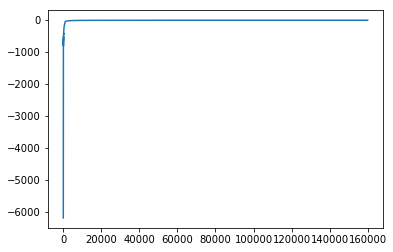

In [16]:
X = np.concatenate([ X_inner, X_outer ])
Y = np.array([0]*int(N/2) + [1]*int(N/2))

n_hidden = 8
W1 = np.random.randn(2, n_hidden)
b1 = np.random.randn(n_hidden)
W2 = np.random.randn(n_hidden)
b2 = np.random.randn(1)
LL = [] # keep track of likelihoods
learning_rate = 0.00005
regularization = 0.2
last_error_rate = None
for i in range(160000):
    pY, Z = forward(X, W1, b1, W2, b2)
    ll = cost(Y, pY)
    prediction = predict(X, W1, b1, W2, b2)
    er = np.abs(prediction - Y).mean()
    LL.append(ll)
    W2 += learning_rate * (derivative_w2(Z, Y, pY) - regularization * W2)
    b2 += learning_rate * (derivative_b2(Y, pY) - regularization * b2)
    W1 += learning_rate * (derivative_w1(X, Z, Y, pY, W2) - regularization * W1)
    b1 += learning_rate * (derivative_b1(Z, Y, pY, W2) - regularization * b1)
    if i % 100 == 0:
        print("i:", i, "ll:", ll, "classification rate:", 1 - er)
plt.plot(LL)
plt.show()